# Aufgabe 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Netowrking
from pyvis.network import Network
import networkx as nx

# 1.)

# Code aus Vorlesung

In [2]:
def read_and_clean_data ( fpath, search_phrases ):
    # read and cleanup; store as a pandas Series for convenience
    with open(fpath,"r") as f:
        abstracts = pd.Series( f.read().splitlines() ).str.lower()
    cleanup = {s:" "+s+" " for s in ["(",")","[","]",",",".",";",":","+","!","?","\"","/","\\","'","~","#"]}
    {
        "(":" ( ",
        ")":" ) ",
        "[":" [ ",
        "]":" ] ",
        ",":" , ",
        ".":" . ",
        ";":" ; ",
        "+":" + ",
        "!":" ! ",
        "?":" ? ",
        "\"":" \" ",
        "'":" ' ",
        "~":""
    }

    # add spaces around special characters; remove multiple spaces
    for k,v in zip(cleanup.keys(), cleanup.values()):
        abstracts = abstracts.str.replace(k, v, regex=False).str.replace("\\s+"," ",regex=True).str.strip()

    # protect search phrases
    for s in search_phrases:
        abstracts = abstracts.str.replace(s, s.replace(" ","_"), regex=False)
    
    # ensure that keywords are kept together: replace spaces by underscores
    search_phrases_protected = [s.replace(" ","_") for s in search_phrases]
    
    return abstracts, search_phrases_protected




In [3]:
def document_term_matrix ( abstracts, batchsize=1000, remove_seldom_quantile=0.0 ):
    # count word occurencies in each abstract. for memory reasons, do this in batches
    for b in range( int ( np.ceil ( len(abstracts)/batchsize) ) ):
        print( "Batch "+str(b))
        _abstracts_countmatrix = abstracts[b*batchsize:(b+1)*batchsize].apply(
            lambda x:pd.Series(x.split("|")[-1].split(" ")).value_counts())

        # throw away very seldom words (unless contained in the search phrases)
        if remove_seldom_quantile > 0:
            idx_keep = _abstracts_countmatrix.sum(axis=0).sort_index()
            idx_keep = idx_keep.index [ (idx_keep > idx_keep.quantile(0.10))
                                       | idx_keep.index.isin(search_phrases_protected) ]
            _abstracts_countmatrix = _abstracts_countmatrix.loc[:,idx_keep].copy()
        
        # in the first iteration, use the temporary matrix as the starting point;
        # in later iterations, concatenate
        if ( b == 0 ):
            abstracts_countmatrix = _abstracts_countmatrix
        else:
            abstracts_countmatrix = pd.concat([abstracts_countmatrix,_abstracts_countmatrix],
                                              axis=0)
    
    # up to now, the "count" for a term that was not found in a document is NA;
    # it is more natural to have zeros here
    abstracts_countmatrix = abstracts_countmatrix.fillna(0.0).astype("int")
    
    return ( abstracts_countmatrix )

# Data Science Abstracts

In [4]:
search_phrases = ["data science"]
data_science_abstracts, result = read_and_clean_data("resources/abstracts_datascience.txt", search_phrases)
date_science_doc_terms = document_term_matrix(data_science_abstracts)
date_science_doc_terms

Batch 0
Batch 1


,data_science,",",and,a,questions,on,for,.,of,with,...,spaced,crowding,forensic,materialized,reformulated,moment-sos,1-norm,relax-ations,sole,meager
0,4,4,3,3,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
1,6,4,2,2,0,0,2,4,2,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,2,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
4,3,3,3,1,0,1,0,4,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1,18,11,5,0,1,3,14,6,2,...,0,0,0,0,0,0,0,0,0,0
1093,1,11,9,2,0,1,1,12,7,3,...,0,0,0,0,0,0,0,0,0,0
1094,1,14,18,7,0,0,1,12,12,0,...,0,0,0,0,0,0,0,0,0,0
1095,1,14,7,9,0,2,0,13,6,1,...,1,1,1,1,0,0,0,0,0,0


# Random Abstracts

In [5]:
random_abstracts, result = read_and_clean_data("resources/abstracts_random.txt", search_phrases)
random_doc_terms = document_term_matrix(random_abstracts)
random_doc_terms

Batch 0


,and,hep-th,/,superseded,extended,in,0105110,0208112,.,cond-mat,...,warming,gps,loading,fluids,ocean,human-induced,ice,continental,fresh,affecting
0,2,2,2,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,13,0,2,0,0,3,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
974,13,0,0,0,0,2,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
975,13,0,0,0,0,1,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
976,13,0,0,0,0,2,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0


# 2.)


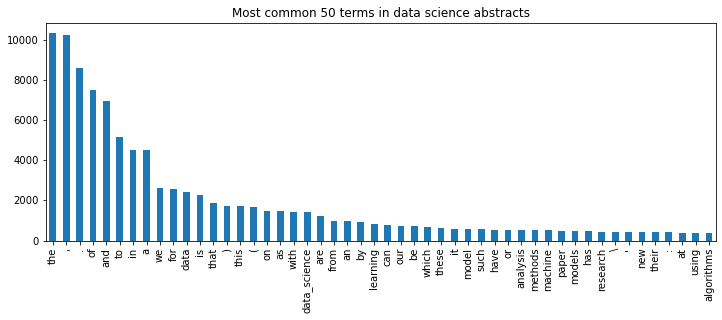

In [6]:
data_science_word_counts = date_science_doc_terms.sum(axis=0)
data_science_word_counts = data_science_word_counts.sort_values()[::-1]
data_science_word_counts[:50].plot.bar(figsize=[12,4],
                                       title="Most common 50 terms in data science abstracts");


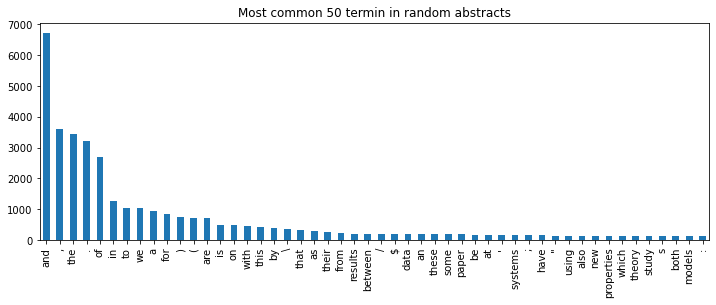

In [7]:
random_word_counts = random_doc_terms.sum(axis=0)
random_word_counts = random_word_counts.sort_values()[::-1]
random_word_counts[:50].plot.bar(figsize=[12,4],
                                          title="Most common 50 termin in random abstracts");

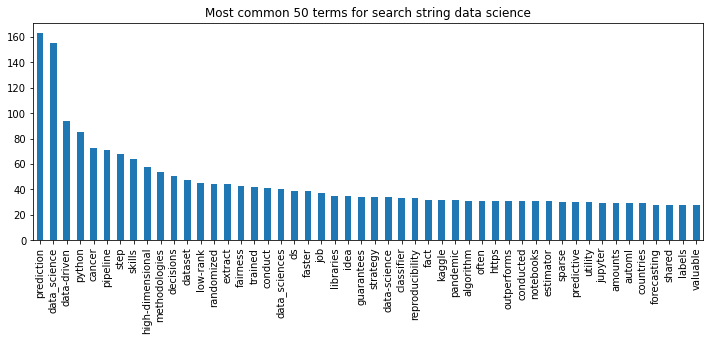

In [8]:
word_counts_compared = data_science_word_counts.divide(
    random_word_counts, fill_value=1)
word_counts_compared = word_counts_compared.sort_values()[::-1]
fifty_most_common_words = word_counts_compared[:50]
fifty_most_common_words.plot.bar(figsize=[12,4],
                                  title="Most common 50 terms for search string data science");


# 3.)

In [9]:
#  Merge abstracts into one frame
all_abstracts = pd.concat([data_science_abstracts, random_abstracts], axis=0)
pd.DataFrame(all_abstracts)

,0
0,although data_science builds on knowledge from...
1,statistics is running the risk of appearing ir...
2,spatial data_science has emerged in recent yea...
3,we review the role of mathematics from a histo...
4,data_science is gaining more and more and wide...
...,...
973,this paper critically assesses wireless broadb...
974,methylammonium lead trihalide perovskite solar...
975,caffe provides multimedia scientists and pract...
976,we present a robust and scalable preconditione...


In [10]:
# Compute relations among terms

terms_raw = [term for term, index in fifty_most_common_words.items()]
terms_count = []

number_term_mapping = {}
for i in range(50):
    term = terms_raw[i]
    number_term_mapping[i] = term


terms_count_matrix = np.zeros(shape=(50,50))

    
for i in range(50):
    term = terms_raw[i]
    abstracts_containing_term = all_abstracts[all_abstracts.str.contains(term)]
    for j in range(50):
        second_term = terms_raw[j]
        abstracts_containing_first_and_second_term = abstracts_containing_term[abstracts_containing_term.str.contains(second_term)]
        terms_count_matrix[i][j] = len(abstracts_containing_first_and_second_term) / len(abstracts_containing_term)
        
print(terms_count_matrix)
        

[[1.         0.85820896 0.06716418 ... 0.00746269 0.02985075 0.01492537]
 [0.10737628 1.         0.06069094 ... 0.02054155 0.01960784 0.02987862]
 [0.13043478 0.94202899 1.         ... 0.04347826 0.         0.04347826]
 ...
 [0.04166667 0.91666667 0.125      ... 1.         0.         0.04166667]
 [0.17391304 0.91304348 0.         ... 0.         1.         0.04347826]
 [0.06060606 0.96969697 0.09090909 ... 0.03030303 0.03030303 1.        ]]


In [11]:
# Filter computed matrix with threshold >= 0.5
threshold = 0.5


for x,y in np.ndindex(terms_count_matrix.shape):
    # Diagooal line: word is matchin itself
    if x == y:
        terms_count_matrix[x][y] = 0
        continue
    value = terms_count_matrix[x][y]
    terms_count_matrix[x][y] = 1 if value >= threshold else 0

In [12]:
# Create pandas dataframe for resulting matrix.
        
terms_count_df = pd.DataFrame(terms_count_matrix, index= [number_term_mapping[i] for i in range(50)])
terms_count_df.columns = [number_term_mapping[i] for i in range(50)]
terms_count_df

,prediction,data_science,data-driven,python,cancer,pipeline,step,skills,high-dimensional,methodologies,...,predictive,utility,jupyter,amounts,automl,countries,forecasting,shared,labels,valuable
prediction,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data_science,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data-driven,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
python,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cancer,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pipeline,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
step,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
skills,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
high-dimensional,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
methodologies,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Visualize result with network.

graph = nx.from_numpy_matrix(terms_count_df.values)
graph = nx.relabel_nodes(graph, dict(enumerate(terms_count_df.columns)))

net = Network(notebook=True)

net.from_nx(graph)
net.show("term_graph.html")